In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\transactions_data.csv")
df

id                 date  client_id  card_id   amount  \
0          7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1          7475328  2010-01-01 00:02:00        561     4575   $14.57   
2          7475329  2010-01-01 00:02:00       1129      102   $80.00   
3          7475331  2010-01-01 00:05:00        430     2860  $200.00   
4          7475332  2010-01-01 00:06:00        848     3915   $46.41   
...            ...                  ...        ...      ...      ...   
13305910  23761868  2019-10-31 23:56:00       1718     2379    $1.11   
13305911  23761869  2019-10-31 23:56:00       1766     2066   $12.80   
13305912  23761870  2019-10-31 23:57:00        199     1031   $40.44   
13305913  23761873  2019-10-31 23:58:00       1986     5443    $4.00   
13305914  23761874  2019-10-31 23:59:00        489     5697   $12.88   

                    use_chip  merchant_id merchant_city merchant_state  \
0          Swipe Transaction        59935        Beulah             ND   
1          Swipe Transaction        67570    Bettendorf             IA   
2          Swipe Transaction        27092         Vista             CA   
3          Swipe Transaction        27092   Crown Point             IN   
4          Swipe Transaction        13051       Harwood             MD   
...                      ...          ...           ...            ...   
13305910    Chip Transaction        86438   West Covina             CA   
13305911  Online Transaction        39261        ONLINE            NaN   
13305912   Swipe Transaction         2925         Allen             TX   
13305913    Chip Transaction        46284     Daly City             CA   
13305914    Chip Transaction        24658    Greenbrier             TN   

              zip   mcc errors  
0         58523.0  5499    NaN  
1         52722.0  5311    NaN  
2         92084.0  4829    NaN  
3         46307.0  4829    NaN  
4         20776.0  5813    NaN  
...           ...   ...    ...  
13305910  91792.0  5499    NaN  
13305911      NaN  5815    NaN  
13305912  75002.0  4900    NaN  
13305913  94014.0  5411    NaN  
13305914  37073.0  5921    NaN  

[13305915 rows x 12 columns]

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace(r'[^\w]', '', regex=True)
df.columns.tolist()

['id',
 'date',
 'client_id',
 'card_id',
 'amount',
 'use_chip',
 'merchant_id',
 'merchant_city',
 'merchant_state',
 'zip',
 'mcc',
 'errors']

In [6]:
df.dtypes

id                  int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object

In [7]:
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y %H:%M", errors="coerce")

In [8]:
df.dtypes

id                         int64
date              datetime64[ns]
client_id                  int64
card_id                    int64
amount                    object
use_chip                  object
merchant_id                int64
merchant_city             object
merchant_state            object
zip                      float64
mcc                        int64
errors                    object
dtype: object

In [9]:
df["amount"] = (
    df["amount"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(" ", "", regex=False)
    .str.replace(r"\((.*)\)", r"-\1", regex=True)
    .astype(float)
)

In [11]:
df.info()
df.describe(include="all")
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             int64         
 11  errors          object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.2+ GB


np.int64(0)

In [12]:
df[df.duplicated()]

Empty DataFrame
Columns: [id, date, client_id, card_id, amount, use_chip, merchant_id, merchant_city, merchant_state, zip, mcc, errors]
Index: []

In [13]:
df.isna().sum()
# Check for missing values

id                       0
date              13305915
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [14]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [15]:
df.isna().sum()

id                       0
date              13305915
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [17]:
df = pd.read_csv(r"D:\transactions_data.csv", dtype=str)
print(df.columns.tolist())
print(df['date'].head(20).tolist())

['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'errors']
['2010-01-01 00:01:00', '2010-01-01 00:02:00', '2010-01-01 00:02:00', '2010-01-01 00:05:00', '2010-01-01 00:06:00', '2010-01-01 00:07:00', '2010-01-01 00:09:00', '2010-01-01 00:14:00', '2010-01-01 00:21:00', '2010-01-01 00:21:00', '2010-01-01 00:23:00', '2010-01-01 00:23:00', '2010-01-01 00:26:00', '2010-01-01 00:27:00', '2010-01-01 00:30:00', '2010-01-01 00:31:00', '2010-01-01 00:32:00', '2010-01-01 00:32:00', '2010-01-01 00:34:00', '2010-01-01 00:36:00']


In [18]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [19]:
df['date'].isna().sum()

np.int64(0)

In [20]:
# 1) create derived time features (memory-aware)
# assumes df['date'] is already datetime64[ns] and contains no NaT
import numpy as np

# Basic splits
df['transaction_date'] = df['date'].dt.date                # python date object (can be used for grouping)
df['transaction_time'] = df['date'].dt.time                # python time object

# Numeric/time parts (fast for grouping/aggregations)
df['year'] = df['date'].dt.year.astype('int16')            # years 2010-2019 -> int16 saves memory
df['month'] = df['date'].dt.month.astype('uint8')          # 1-12
df['day'] = df['date'].dt.day.astype('uint8')              # 1-31
df['hour'] = df['date'].dt.hour.astype('uint8')            # 0-23
df['minute'] = df['date'].dt.minute.astype('uint8')        # 0-59 (optional; useful if you need minute-level analysis)
# weekday as human string and as numeric
df['weekday'] = df['date'].dt.day_name()                   
df['weekday_num'] = df['date'].dt.weekday.astype('uint8')  # Monday=0 .. Sunday=6

# ISO week / quarter if you need them
# .dt.isocalendar() returns a DataFrame in newer pandas versions
iso = df['date'].dt.isocalendar()
df['iso_year'] = iso['year'].astype('int16')
df['iso_week'] = iso['week'].astype('uint8')

df['quarter'] = df['date'].dt.quarter.astype('uint8')

# Useful flags
df['is_weekend'] = (df['weekday_num'] >= 5).astype('uint8')  # 1 if Sat/Sun, else 0

# Convert low-cardinality string fields to category to save memory
df['weekday'] = df['weekday'].astype('category')

# Quick sanity/head check
print("Sample derived features:")
display(df.loc[:, ['date','transaction_date','transaction_time','year','month','day','hour','weekday','is_weekend']].head(6))

# Show memory usage before/after for these new columns
print("\nMemory usage for new cols (bytes):")
print(df[['year','month','day','hour','weekday_num','iso_week','quarter','is_weekend']].memory_usage(deep=True))

Sample derived features:


date transaction_date transaction_time  year  month  day  \
0 2010-01-01 00:01:00       2010-01-01         00:01:00  2010      1    1   
1 2010-01-01 00:02:00       2010-01-01         00:02:00  2010      1    1   
2 2010-01-01 00:02:00       2010-01-01         00:02:00  2010      1    1   
3 2010-01-01 00:05:00       2010-01-01         00:05:00  2010      1    1   
4 2010-01-01 00:06:00       2010-01-01         00:06:00  2010      1    1   
5 2010-01-01 00:07:00       2010-01-01         00:07:00  2010      1    1   

   hour weekday  is_weekend  
0     0  Friday           0  
1     0  Friday           0  
2     0  Friday           0  
3     0  Friday           0  
4     0  Friday           0  
5     0  Friday           0


Memory usage for new cols (bytes):
Index               132
year           26611830
month          13305915
day            13305915
hour           13305915
weekday_num    13305915
iso_week       13305915
quarter        13305915
is_weekend     13305915
dtype: int64


In [21]:
df.describe()
df.describe(include='object')
# Summary statistics

id client_id   card_id    amount           use_chip merchant_id  \
count   13305915  13305915  13305915  13305915           13305915    13305915   
unique  13305915      1219      4071     81161                  3       74831   
top     23761874      1098      4938    $80.00  Swipe Transaction       59935   
freq           1     48479     31552    132115            6967185      610053   

       merchant_city merchant_state       zip       mcc                errors  \
count       13305915       11742215  11653209  13305915                211393   
unique         12492            199     25256       109                    22   
top           ONLINE             CA   98516.0      5411  Insufficient Balance   
freq         1563700        1427087     36753   1592584                130902   

       transaction_date transaction_time  
count          13305915         13305915  
unique             3591             1440  
top          2018-12-25         12:52:00  
freq               4164            16841

In [22]:
df['amount'] = df['amount'].replace('[\$,]', '', regex=True).astype(float)

In [23]:
print(df['amount'].describe())

count    1.330592e+07
mean     4.297604e+01
std      8.165575e+01
min     -5.000000e+02
25%      8.930000e+00
50%      2.899000e+01
75%      6.371000e+01
max      6.820200e+03
Name: amount, dtype: float64


In [24]:
df['merchant_state'] = df['merchant_state'].fillna("UNKNOWN")

In [26]:
# Remove decimals AND non-numeric characters
df['zip'] = (
    df['zip']
    .astype(str)
    .str.extract(r'(\d+)')       # keep only digits
    .astype('Int64')             # convert to nullable integer
)

In [27]:
df['zip'] = df['zip'].astype('Int64').astype(str).str.zfill(5)

In [28]:
df['zip'].head()
df['zip'].isna().sum()

np.int64(0)

In [29]:
df_daily = df.groupby(df['date'].dt.date).size()
df_daily.head()

date
2010-01-01    3463
2010-01-02    2989
2010-01-03    3311
2010-01-04    3244
2010-01-05    3330
dtype: int64

In [30]:
df['amount'].describe()

count    1.330592e+07
mean     4.297604e+01
std      8.165575e+01
min     -5.000000e+02
25%      8.930000e+00
50%      2.899000e+01
75%      6.371000e+01
max      6.820200e+03
Name: amount, dtype: float64

In [31]:
df['merchant_city'].value_counts().head(10)
df['merchant_state'].value_counts().head(10)
df['merchant_id'].value_counts().head(10)
# Identify hotspots

merchant_id
59935    610053
27092    589140
61195    562410
39021    440281
43293    362842
22204    347511
14528    333505
60569    301657
50783    298231
75781    273351
Name: count, dtype: int64

In [32]:
df['use_chip'].value_counts()
# Detect any fraud in swipe and online

use_chip
Swipe Transaction     6967185
Chip Transaction      4780818
Online Transaction    1557912
Name: count, dtype: int64

In [33]:
df[df['use_chip'] == 'Online Transaction']['errors'].value_counts().head(10)
# Online transactions with errors: insufficient balance, declined, fraud

errors
Insufficient Balance                    12160
Bad Card Number                          7766
Bad Expiration                           6161
Bad CVV                                  6103
Technical Glitch                         3024
Bad Card Number,Insufficient Balance       70
Bad CVV,Insufficient Balance               57
Bad Expiration,Insufficient Balance        47
Bad Card Number,Bad CVV                    38
Bad Card Number,Bad Expiration             33
Name: count, dtype: int64

In [34]:
df[(df['use_chip'] == 'Swipe Transaction') & (df['amount'] > 500)].sort_values('amount', ascending=False).head(20)
# Swipe transactions with high amount: possibly fraudsters

id                date client_id card_id   amount  \
892174    8544734 2010-09-22 06:37:00       708    5165  6820.20   
2888921  10973185 2012-04-10 11:05:00      1259    5406  5913.37   
6388103  15245857 2014-11-13 10:27:00      1259    5406  5654.50   
5793720  14517073 2014-06-07 11:06:00      1259    2006  4747.97   
1813332   9662810 2011-06-13 14:24:00        96    3773  4685.23   
3841748  12133889 2012-12-28 16:10:00      1811     291  4175.85   
177166    7686947 2010-02-23 15:22:00       776    5859  4004.73   
6052501  14834251 2014-08-15 14:13:00        96    5175  3732.84   
603507    8197899 2010-06-30 10:48:00       708    5165  3424.51   
6007680  14779124 2014-08-03 14:01:00       708     281  3380.98   
1774765   9615659 2011-06-02 14:29:00       708     281  3362.97   
465395    8032429 2010-05-20 16:58:00      1487    5978  3271.94   
9081367  18549776 2016-10-22 10:49:00       708    5165  3215.36   
4299845  12693277 2013-05-02 16:45:00      1487    4946  3103.32   
8930940  18365039 2016-09-12 17:44:00      1487    4946  3086.83   
2923737  11015573 2012-04-20 02:48:00       708     281  3081.81   
7500743  16610037 2015-09-02 16:47:00      1028     342  3062.19   
4064236  12404960 2013-02-27 16:47:00       708     281  3039.73   
2777350  10837142 2012-03-10 10:07:00       708     281  2945.65   
8976910  18421519 2016-09-24 22:31:00       708    5165  2898.43   

                  use_chip merchant_id  merchant_city merchant_state    zip  \
892174   Swipe Transaction       34524  Staten Island             NY  10302   
2888921  Swipe Transaction       85983         Wilton             CT  06897   
6388103  Swipe Transaction       76639       Stamford             CT  06907   
5793720  Swipe Transaction       84905         Wilton             CT  06897   
1813332  Swipe Transaction       81591    Yorba Linda             CA  92886   
3841748  Swipe Transaction       59223     Menlo Park             CA  94025   
177166   Swipe Transaction       76639        Memphis             TN  38107   
6052501  Swipe Transaction       60569  Santa Barbara             CA  93101   
603507   Swipe Transaction       80871   Philadelphia             PA  19114   
6007680  Swipe Transaction       38489       Elmhurst             NY  11373   
1774765  Swipe Transaction       80871   Philadelphia             PA  19114   
465395   Swipe Transaction       89590  Cranberry Twp             PA  16066   
9081367  Swipe Transaction       60152       Brooklyn             NY  11208   
4299845  Swipe Transaction       60569      Hermitage             PA  16148   
8930940  Swipe Transaction       89590  Cranberry Twp             PA  16066   
2923737  Swipe Transaction       95676         Hilton             NY  14468   
7500743  Swipe Transaction       76639        Chicago             IL  60639   
4064236  Swipe Transaction       60152       Brooklyn             NY  11208   
2777350  Swipe Transaction       47203     Louisville             AL  36048   
8976910  Swipe Transaction       95826        Memphis             TN  38135   

         ... month day hour minute    weekday  weekday_num  iso_year  \
892174   ...     9  22    6     37  Wednesday            2      2010   
2888921  ...     4  10   11      5    Tuesday            1      2012   
6388103  ...    11  13   10     27   Thursday            3      2014   
5793720  ...     6   7   11      6   Saturday            5      2014   
1813332  ...     6  13   14     24     Monday            0      2011   
3841748  ...    12  28   16     10     Friday            4      2012   
177166   ...     2  23   15     22    Tuesday            1      2010   
6052501  ...     8  15   14     13     Friday            4      2014   
603507   ...     6  30   10     48  Wednesday            2      2010   
6007680  ...     8   3   14      1     Sunday            6      2014   
1774765  ...     6   2   14     29   Thursday            3      2011   
465395   ...     5  20   16     58   Thursday            3    

In [35]:
df.groupby(['client_id', 'use_chip'])['errors'].apply(lambda x: (x != '').sum()).sort_values(ascending=False).head(10)
# Multiple failed attempts before success: fraud flag

client_id  use_chip         
1098       Swipe Transaction    24356
           Chip Transaction     23725
96         Swipe Transaction    23226
909        Swipe Transaction    21460
1459       Swipe Transaction    21061
285        Swipe Transaction    20976
1888       Swipe Transaction    20741
1963       Swipe Transaction    19399
502        Swipe Transaction    19131
1888       Chip Transaction     18881
Name: errors, dtype: int64

In [36]:
df[df['errors'] != ''].groupby('merchant_id')['errors'].count().sort_values(ascending=False).head(10)
# Merchants with unusually high declines

merchant_id
27092    18206
59935    11417
39021     8992
61195     8743
60569     6306
43293     6070
22204     6052
26810     3491
20561     3429
50783     3395
Name: errors, dtype: int64

In [37]:
failed_attempts = (
    df[df['errors'] != '']
    .groupby('client_id')['errors']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

failed_attempts
# Top 10 clients with frequent declines, insufficient balance, fraud flags, etc

client_id
954     2935
1888    2109
464     1196
1098    1125
1696     953
425      847
1424     822
1382     821
373      816
114      796
Name: errors, dtype: int64

In [40]:
# create full datetime without copying
df['full_datetime'] = pd.to_datetime(
    df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str)
)

# keep only needed columns to reduce memory
cols = ['client_id', 'merchant_state', 'full_datetime']
df_small = df[cols]

# sort only the small df
df_small = df_small.sort_values(['client_id', 'full_datetime'])

df_small['prev_state'] = df_small.groupby('client_id')['merchant_state'].shift()
df_small['prev_time'] = df_small.groupby('client_id')['full_datetime'].shift()

df_small['time_diff'] = df_small['full_datetime'] - df_small['prev_time']

suspicious_travel = df_small[
    (df_small['merchant_state'] != df_small['prev_state']) &
    (df_small['time_diff'].dt.total_seconds() < 1800)
]

suspicious_travel.head()
# Same client spending in different states within 30 minutes

client_id merchant_state       full_datetime prev_state  \
11584          0             ME 2010-01-04 13:19:00    UNKNOWN   
28007          0             MA 2010-01-09 14:50:00         NV   
146412         0        UNKNOWN 2010-02-14 13:05:00         ME   
244142         0             MI 2010-03-15 19:25:00    UNKNOWN   
256330         0             ME 2010-03-19 13:51:00         MI   

                 prev_time       time_diff  
11584  2010-01-04 13:03:00 0 days 00:16:00  
28007  2010-01-09 14:36:00 0 days 00:14:00  
146412 2010-02-14 12:49:00 0 days 00:16:00  
244142 2010-03-15 19:23:00 0 days 00:02:00  
256330 2010-03-19 13:42:00 0 days 00:09:00

In [43]:
# Force amount to string, then remove $, commas, etc.
df['amount_numeric'] = (
    df['amount']
      .astype(str)
      .str.replace('[\$,]', '', regex=True)
      .astype(float)
)

In [45]:
max_amount = df.groupby('client_id')['amount_numeric'].max()

In [46]:
df['has_error'] = df['errors'].astype(str).str.strip() != ''
error_count = df.groupby('client_id')['has_error'].sum()
# Count errors per client

In [47]:
fraud_clients = (max_amount > 500) & (error_count > 3)
fraud_clients = fraud_clients[fraud_clients]   # keep only True
#Identify suspicious clients

In [48]:
fraud_clients.head(10)

client_id
0       True
1       True
100     True
1002    True
1003    True
1006    True
1008    True
1009    True
1012    True
1016    True
dtype: bool

In [8]:
import pandas as pd

# Load data
df = pd.read_csv(r"D:\transactions_data.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract weekday and hour
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Build pivot heatmap-friendly table
pivot = df.pivot_table(
    index='weekday',
    columns='hour',
    values='id',
    aggfunc='count'
).fillna(0)

pivot.head()

hour         0      1      2      3      4      5       6       7       8   \
weekday                                                                      
Friday    20243  16439  15938  14831  16352  26252  107709  128098  125653   
Monday    19883  16397  16113  14598  16475  25913  107556  128175  124947   
Saturday  20100  16598  16067  14901  16198  26323  108520  128340  125829   
Sunday    19998  16559  16034  14827  16564  26206  108354  128245  125347   
Thursday  19978  16578  16330  14934  16698  26340  110859  131713  127966   

hour          9   ...      14      15      16     17     18     19     20  \
weekday           ...                                                       
Friday    125371  ...  127156  122440  123178  68766  67605  65097  60460   
Monday    124357  ...  126793  122635  123667  69223  67822  65728  60728   
Saturday  124890  ...  127491  122475  123640  69342  67415  65457  60520   
Sunday    125221  ...  126166  122097  124167  68866  67394  65241  60536   
Thursday  126941  ...  127155  122996  123668  68704  67577  65300  60379   

hour         21     22     23  
weekday                        
Friday    60485  59130  22245  
Monday    60758  60239  22755  
Saturday  60797  59979  22838  
Sunday    60804  59845  22887  
Thursday  60479  59795  23002  

[5 rows x 24 columns]

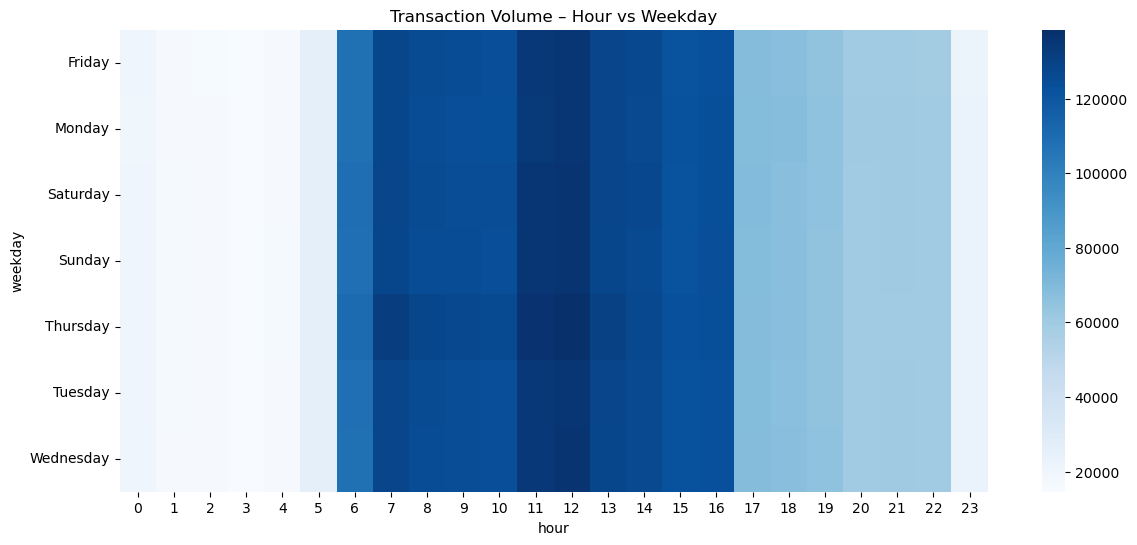

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="Blues")
plt.title("Transaction Volume – Hour vs Weekday")
plt.show()

In [10]:
hourly = df.pivot_table(
    index='hour',
    columns='use_chip',
    values='id',
    aggfunc='count'
).fillna(0)

hourly

use_chip  Chip Transaction  Online Transaction  Swipe Transaction
hour                                                             
0                    45130               29960              65492
1                    39627               21651              54308
2                    38394               18528              55865
3                    37144               11926              54408
4                    37546               22795              54644
5                    63869               25218              93878
6                   277309               82772             398775
7                   326774              101819             473163
8                   327643               84554             468304
9                   321677               98099             456647
10                  313471               94327             463714
11                  344012              100437             499222
12                  349391               83265             520842
13                  319711               96248             484744
14                  310297              120269             457210
15                  305534              112134             440354
16                  292645              132134             439899
17                  171419               60779             250032
18                  174351               46115             252093
19                  167703               55001             234730
20                  148190               49204             226242
21                  155880               46311             222332
22                  158757               37289             222831
23                   54344               27077              77456

In [11]:
hourly_pct = hourly.div(hourly.sum(axis=1), axis=0) * 100
hourly_pct

use_chip  Chip Transaction  Online Transaction  Swipe Transaction
hour                                                             
0                32.102261           21.311405          46.586334
1                34.283564           18.731507          46.984929
2                34.041157           16.427425          49.531418
3                35.895553           11.525155          52.579292
4                32.652955           19.824325          47.522720
5                34.907769           13.782964          51.309267
6                36.543033           10.907471          52.549496
7                36.237519           11.291192          52.471289
8                37.210974            9.602942          53.186084
9                36.703396           11.193111          52.103493
10               35.968638           10.823374          53.207988
11               36.454654           10.643222          52.902124
12               36.643076            8.732583          54.624341
13               35.495718           10.685875          53.818406
14               34.952173           13.547224          51.500604
15               35.609110           13.068896          51.321994
16               33.844391           15.281295          50.874314
17               35.547146           12.603737          51.849118
18               36.895076            9.758570          53.346355
19               36.661682           12.023811          51.314507
20               34.980502           11.614688          53.404810
21               36.718859           10.908950          52.372192
22               37.900625            8.902136          53.197239
23               34.205077           17.042744          48.752179

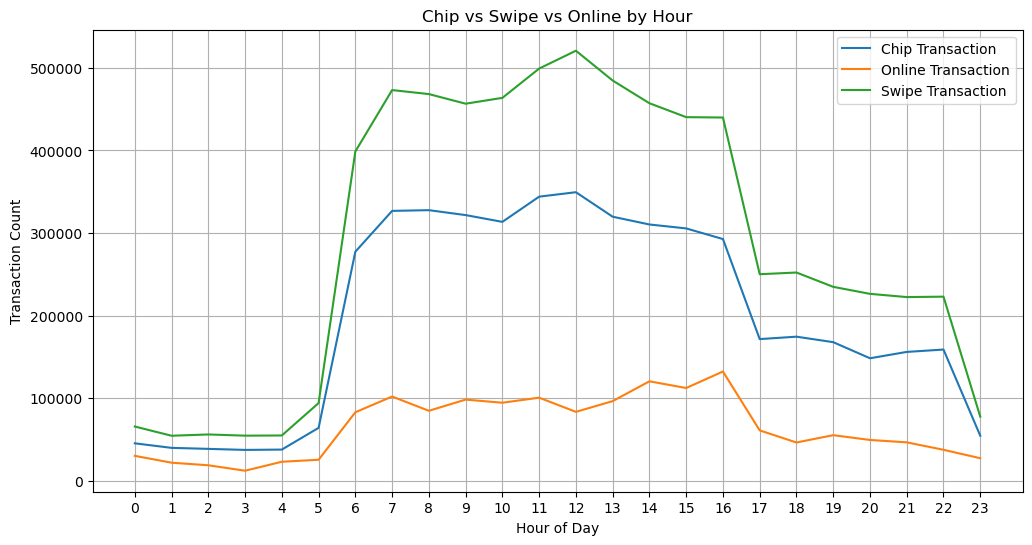

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for method in hourly.columns:
    plt.plot(hourly.index, hourly[method], label=method)

plt.xticks(range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.title("Chip vs Swipe vs Online by Hour")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
zip_counts = df.groupby('zip')['id'].count().sort_values(ascending=False)
zip_counts.head(20)

zip
98516.0    36753
91606.0    31337
87121.0    30679
77056.0    26764
55024.0    26478
80013.0    26037
95687.0    25722
29229.0    25166
30101.0    24425
40299.0    24403
43228.0    23382
43830.0    23281
94606.0    22842
96792.0    21601
11211.0    20710
10463.0    20208
92886.0    19534
85711.0    19515
48235.0    19098
38606.0    18727
Name: id, dtype: int64

In [16]:
df['amount_numeric'] = (
    df['amount'].astype(str)
        .str.replace('[\$,]', '', regex=True)
        .astype(float)
)

zip_stats = df.groupby('zip').agg(
    transactions=('id', 'count'),
    total_amount=('amount_numeric', 'sum'),
    avg_ticket=('amount_numeric', 'mean'),
)

zip_stats.sort_values('transactions', ascending=False).head(20)

transactions  total_amount  avg_ticket
zip                                            
98516.0         36753     562377.66   15.301544
91606.0         31337     631046.62   20.137429
87121.0         30679     594320.79   19.372235
77056.0         26764     758313.72   28.333348
55024.0         26478     776813.89   29.338088
80013.0         26037     820306.50   31.505415
95687.0         25722     783962.04   30.478269
29229.0         25166     519424.33   20.639924
30101.0         24425     610440.96   24.992465
40299.0         24403    1009687.50   41.375548
43228.0         23382     628555.86   26.882040
43830.0         23281     400824.69   17.216816
94606.0         22842    1270007.55   55.599665
96792.0         21601    1389858.72   64.342332
11211.0         20710     377139.97   18.210525
10463.0         20208     988292.02   48.905979
92886.0         19534    1537589.19   78.713484
85711.0         19515     845265.97   43.313655
48235.0         19098     513633.49   26.894622
38606.0         18727     242110.49   12.928418

In [17]:
refunds = df[df['amount_numeric'] < 0]
hot_refund_zips = refunds.groupby('zip')['id'].count().sort_values(ascending=False)

hot_refund_zips.head(20)

zip
98516.0    8550
55024.0    7386
29229.0    6569
91606.0    6384
43830.0    6214
77056.0    6162
7922.0     5225
94606.0    4946
96792.0    4687
51022.0    4467
48146.0    4456
51023.0    4353
89148.0    4318
87121.0    4053
19146.0    3765
67212.0    3684
80013.0    3545
18011.0    3404
94131.0    3362
92886.0    3253
Name: id, dtype: int64

In [18]:
fraud_index = pd.DataFrame({
    'transactions': zip_counts,
    'refunds': hot_refund_zips
}).fillna(0)

fraud_index['refund_rate'] = fraud_index['refunds'] / fraud_index['transactions']
fraud_index.sort_values('refund_rate', ascending=False).head(20)

transactions  refunds  refund_rate
zip                                        
53543.0             2      1.0     0.500000
67117.0            11      4.0     0.363636
41729.0             3      1.0     0.333333
60012.0             3      1.0     0.333333
38069.0             3      1.0     0.333333
28544.0             6      2.0     0.333333
4462.0             36     12.0     0.333333
38042.0            24      8.0     0.333333
43718.0             3      1.0     0.333333
8056.0              3      1.0     0.333333
93613.0             9      3.0     0.333333
93622.0            12      4.0     0.333333
3583.0              3      1.0     0.333333
94011.0             3      1.0     0.333333
6282.0              3      1.0     0.333333
94304.0             3      1.0     0.333333
5764.0              9      3.0     0.333333
39086.0             3      1.0     0.333333
41121.0             3      1.0     0.333333
99521.0             3      1.0     0.333333

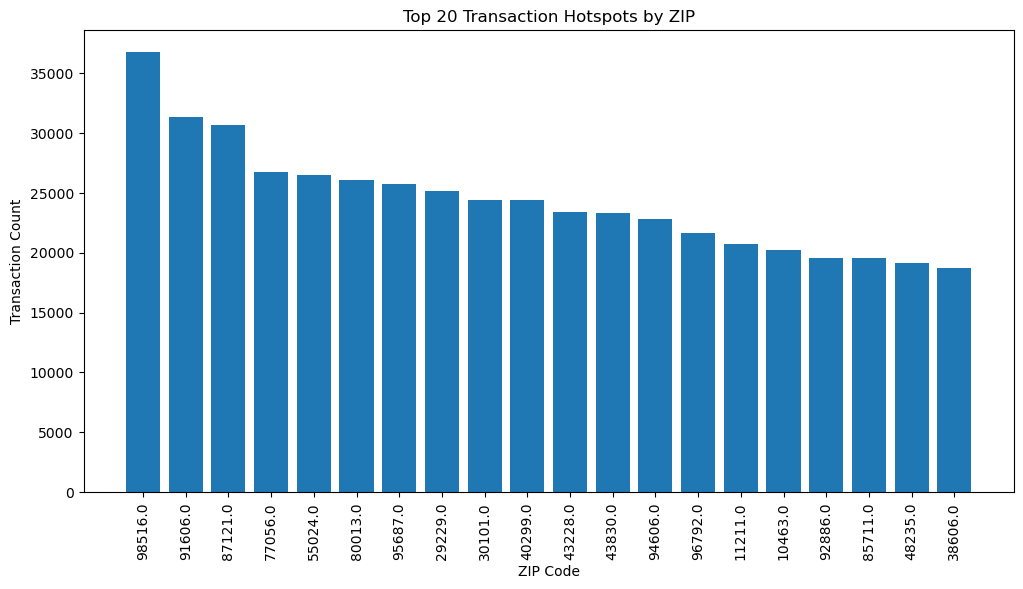

In [19]:
import matplotlib.pyplot as plt

top20 = zip_counts.head(20)
plt.figure(figsize=(12,6))
plt.bar(top20.index.astype(str), top20.values)
plt.xticks(rotation=90)
plt.title("Top 20 Transaction Hotspots by ZIP")
plt.xlabel("ZIP Code")
plt.ylabel("Transaction Count")
plt.show()

In [20]:
df['amount_numeric'] = (
    df['amount']
        .astype(str)
        .str.replace('[\$,]', '', regex=True)
        .astype(float)
)

In [21]:
merchant_stats = df.groupby('merchant_id').agg(
    transactions=('id', 'count'),
    total_amount=('amount_numeric', 'sum'),
    avg_ticket=('amount_numeric', 'mean'),
    unique_customers=('client_id', 'nunique')
)
merchant_stats.sort_values('transactions', ascending=False).head(10)

transactions  total_amount  avg_ticket  unique_customers
merchant_id                                                          
59935              610053    8937586.07   14.650508              1182
27092              589140   53158515.64   90.230702              1177
61195              562410   12013083.65   21.360011              1213
39021              440281   15725396.27   35.716727               266
43293              362842    5635003.58   15.530186              1159
22204              347511    7385156.10   21.251575              1182
14528              333505     440574.81    1.321044               427
60569              301657   18900001.41   62.653946              1219
50783              298231    7717215.21   25.876637              1184
75781              273351    6692820.16   24.484345              1156

In [22]:
refunds = df[df['amount_numeric'] < 0]

refund_stats = refunds.groupby('merchant_id').agg(
    refund_count=('id', 'count'),
    refund_amount=('amount_numeric', 'sum'),
)

# merge with overall stats
merchant_risk = merchant_stats.merge(refund_stats, on='merchant_id', how='left').fillna(0)

merchant_risk['refund_rate'] = merchant_risk['refund_count'] / merchant_risk['transactions']
merchant_risk.sort_values('refund_rate', ascending=False).head(20)

transactions  total_amount  avg_ticket  unique_customers  \
merchant_id                                                             
59053                   2        -84.47  -42.235000                 1   
53405                   2        -26.83  -13.415000                 1   
5009                    2       -263.78 -131.890000                 1   
94191                   2        302.04  151.020000                 1   
66680                   2       -177.51  -88.755000                 1   
10991                   2       -145.41  -72.705000                 1   
80353                   2       -281.23 -140.615000                 1   
58730                   5         -7.81   -1.562000                 2   
98050                   5        182.11   36.422000                 2   
68001                   8        245.50   30.687500                 3   
89922                   8        609.43   76.178750                 3   
87706                  11        667.25   60.659091                 4   
83240                  11        -33.32   -3.029091                 4   
66149                  14        681.40   48.671429                 5   
66954                  95       6456.89   67.967263                32   
24684                   3        159.90   53.300000                 1   
87288                   9        802.27   89.141111                 3   
37446                   3        206.69   68.896667                 1   
29739                   3        157.23   52.410000                 1   
7099                    9        896.52   99.613333                 3   

             refund_count  refund_amount  refund_rate  
merchant_id                                            
59053                 1.0         -382.0     0.500000  
53405                 1.0         -162.0     0.500000  
5009                  1.0         -460.0     0.500000  
94191                 1.0         -166.0     0.500000  
66680                 1.0         -316.0     0.500000  
10991                 1.0         -325.0     0.500000  
80353                 1.0         -473.0     0.500000  
58730                 2.0         -657.0     0.400000  
98050                 2.0         -735.0     0.400000  
68001                 3.0        -1033.0     0.375000  
89922                 3.0        -1221.0     0.375000  
87706                 4.0        -1324.0     0.363636  
83240                 4.0        -1164.0     0.363636  
66149                 5.0        -1247.0     0.357143  
66954                32.0        -9622.0     0.336842  
24684                 1.0         -479.0     0.333333  
87288                 3.0         -748.0     0.333333  
37446                 1.0         -151.0     0.333333  
29739                 1.0         -273.0     0.333333  
7099                  3.0        -1109.0     0.333333

In [23]:
pivot = df.pivot_table(
    index='merchant_id',
    columns='use_chip',
    values='id',
    aggfunc='count',
    fill_value=0
)

pivot['online_ratio'] = pivot['Online Transaction'] / (
    pivot['Online Transaction'] + pivot['Swipe Transaction'] + pivot['Chip Transaction']
)
pivot['swipe_ratio'] = pivot['Swipe Transaction'] / (
    pivot['Online Transaction'] + pivot['Swipe Transaction'] + pivot['Chip Transaction']
)